### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Para ello vamos a utilizar un conjunto de datos provenientes de un estudio de granos pertenecientes a distintas variedades de trigo. Los atributos de los datos provienen de una visualización de alta calidad de la estructura interna del grano utilizando una técnica de rayos X suaves. La ventaja de esta técnica es que no es destructiva y es considerablemente más económica que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando grano de trigo cosechado en combinación procedente de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Los atributos observados son seis parámetros geométricos medidos en los granos de trigo:

V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla

Se trata de analizar de que manera estos atributos permiten generar grupos en los datos que correspondan idealmente a cada variedad de trigo disponible en los datos.

      V1    V2    V3    V4    V5    V6
1  16.63 15.46 6.053 3.465 2.040 5.877
2  20.03 16.90 6.493 3.857 3.063 6.320
3  15.60 15.11 5.832 3.286 2.725 5.752
4  10.82 12.83 5.180 2.630 4.853 5.089
5  14.79 14.52 5.545 3.291 2.704 5.111
6  14.03 14.16 5.438 3.201 1.717 5.001
7  16.44 15.25 5.884 3.505 1.969 5.533
8  13.78 14.06 5.479 3.156 3.136 4.872
9  18.76 16.20 6.172 3.796 3.120 6.053
10 12.88 13.50 5.139 3.119 2.352 4.607


       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

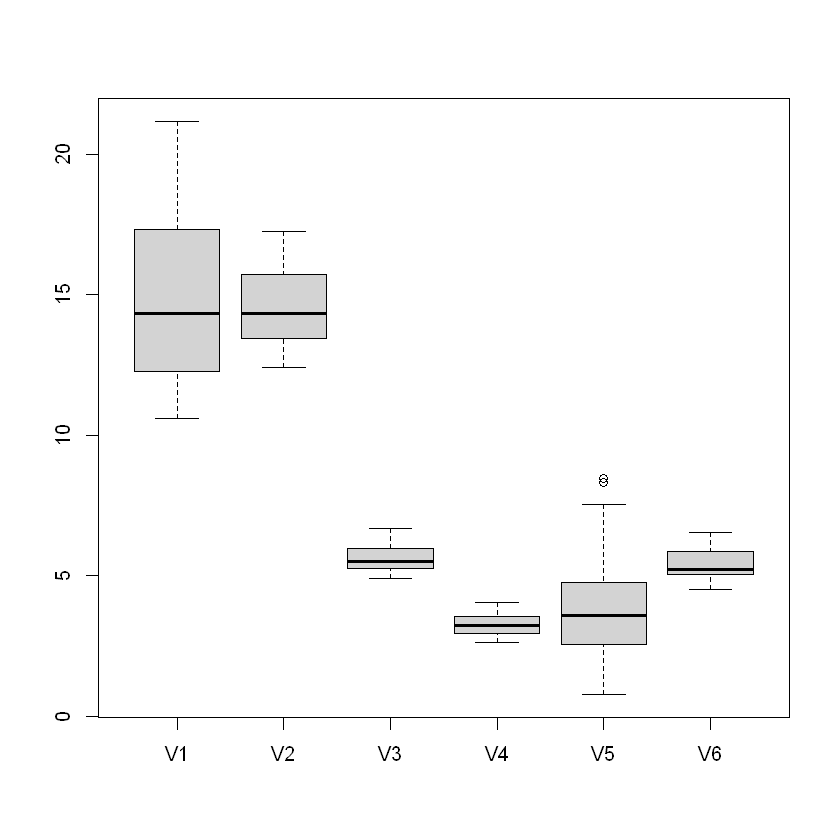

In [1]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")

print(datos[1:10,])
summary(datos)
boxplot(datos)

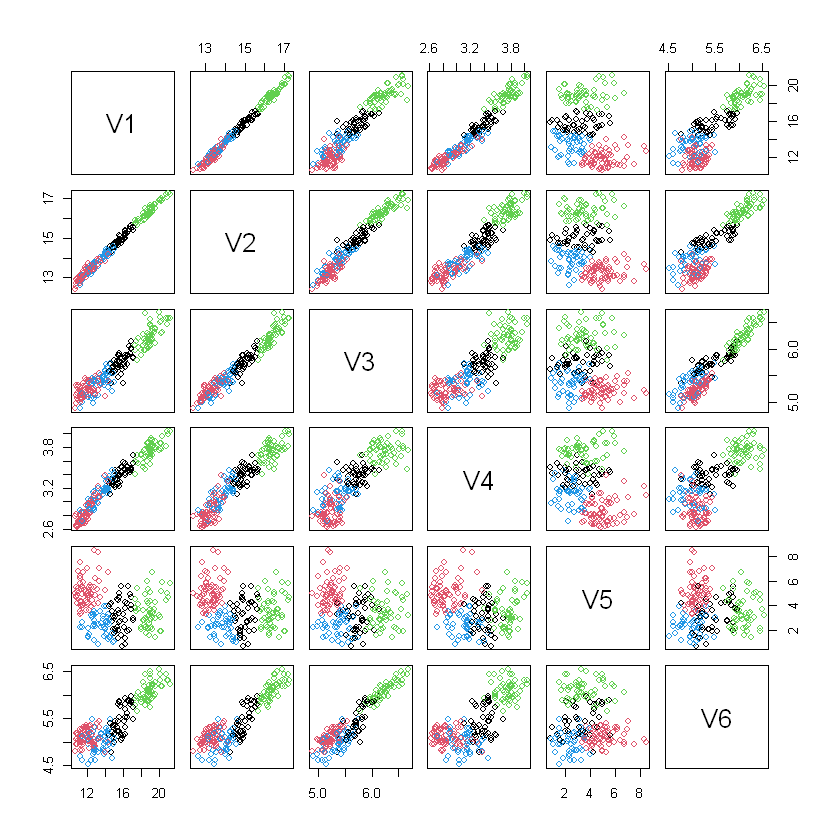

In [2]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 2,3 o 4 grupos con el algoritmo KMeans, se obtienen grupos bastante bien diferenciados por las variables area, perimetro longitud de las semillas. Las tres últimas variables tienen valores con mayor nivel de confusión entre los grupos definidos por kmeans.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,0.6362517,0.3177031,0.12251442,0.05021075,-0.0084876163,-0.025890456
2,-2.1376924,-0.7392228,-0.11677986,-0.03800567,-0.0009242843,0.005265824
3,3.0936321,-0.2499533,-0.04446158,-0.04386905,0.0115749668,0.013458399
4,-1.1731198,1.0501576,0.10256003,0.05800065,-0.0041432679,0.001410480


K-means clustering with 4 clusters of sizes 44, 66, 54, 46

Cluster means:
        V1       V2       V3       V4       V5       V6
1 15.71909 14.97659 5.745182 3.398500 3.187045 5.448386
2 11.91439 13.26152 5.231227 2.863939 5.068288 5.105348
3 18.96296 16.39667 6.242722 3.749926 3.540333 6.100778
4 13.39109 13.86522 5.366000 3.114283 2.415804 4.990674

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   3   1   2   1   4   1   4   3   4   2   1   1   1   3   2   2   1   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   3   1   2   2   1   2   4   4   3   1   4   2   1   3   3   3   2   1   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  4   2   3   4   2   3   3   2   2   2   3   4   1   2   1   4   1   1   3   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  4   3   4   1   3   4   3   1   3   2   3   4   1   3   

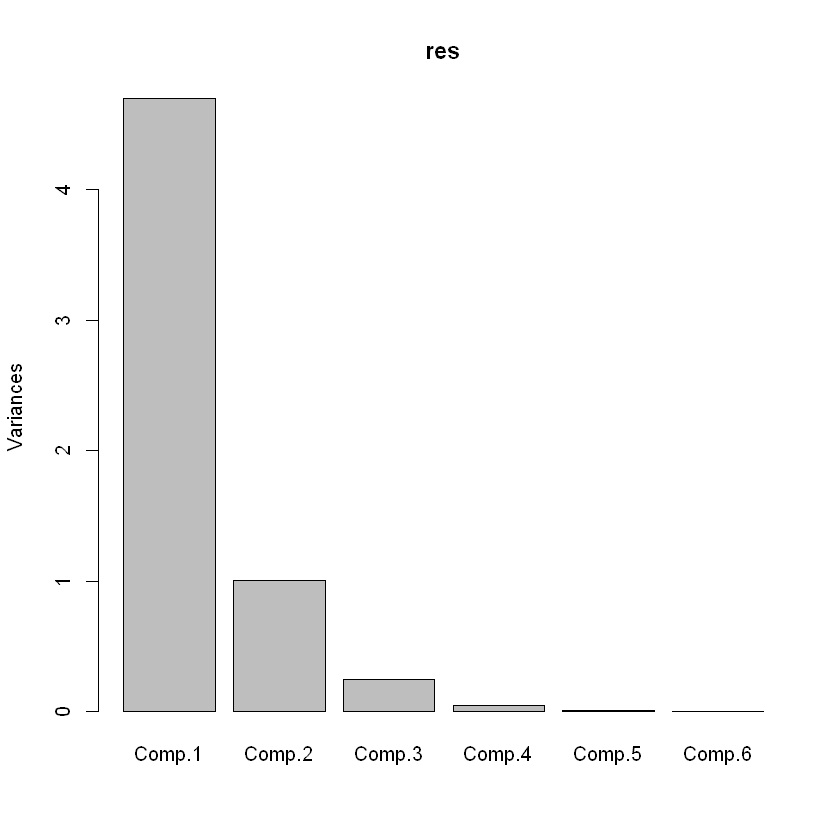

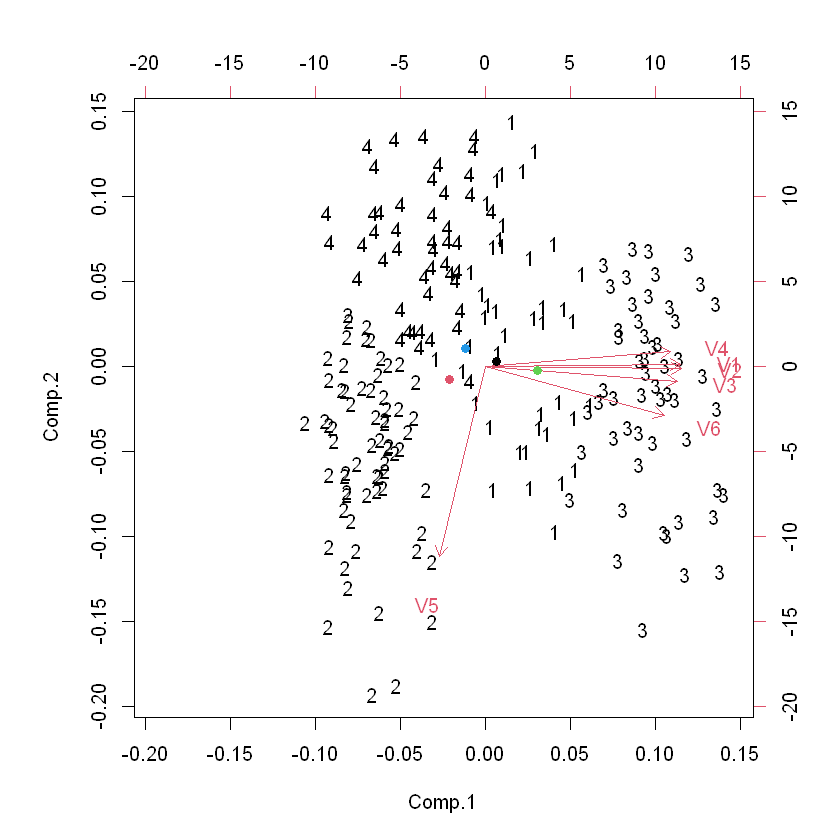

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 2 representa a las semillas con mayores valores de todas las variables excepto V5, el coeficiente de simetría. El grupo 1 representa las semillas con valores intermendios de las distintas variables  y los grupos 3 y 4 con los menores valores. Se distinguen el grupo 3 del 4 por sus mayores valores de V5 el coeficiente de simetría. 


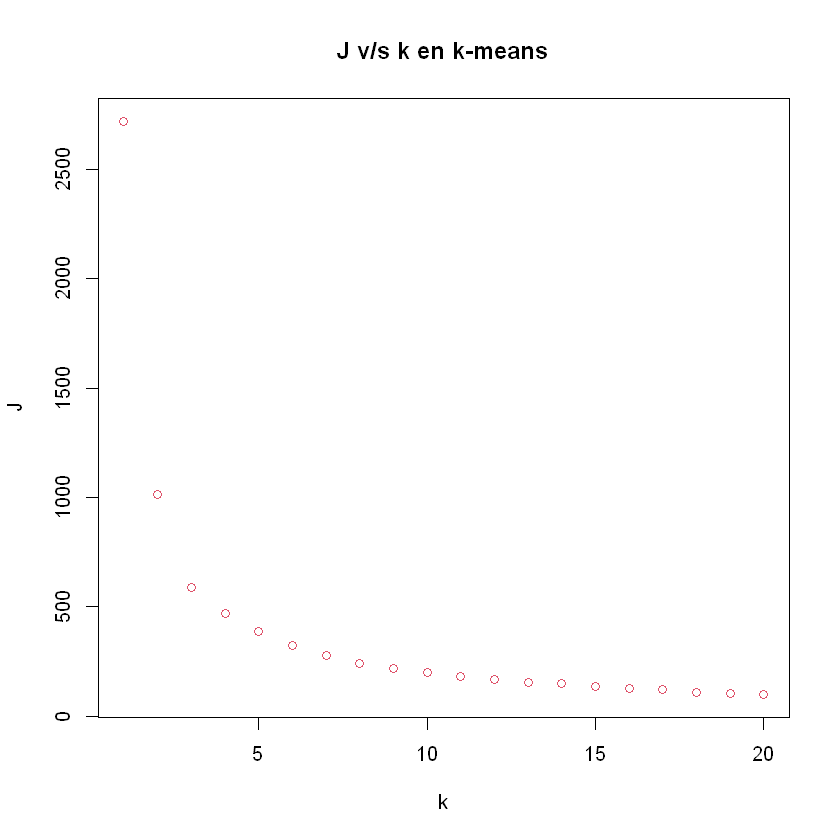

In [4]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 1:

1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Explique su decisión.
2. Realice nuevamente los cálculos con el K óptimo y  aracterice los grupos obtenidos. Interprete sus resultados

In [5]:
#1. De acuerdo al gráfico, se puede ver que el codo se genera con k=3, dando así cómo el valor K más apropiado
#Esto debido a diversos factores, entre ellos, que:
#Su rendimiento no mejora mucho desde k=3, empezando a ser logarítmico.

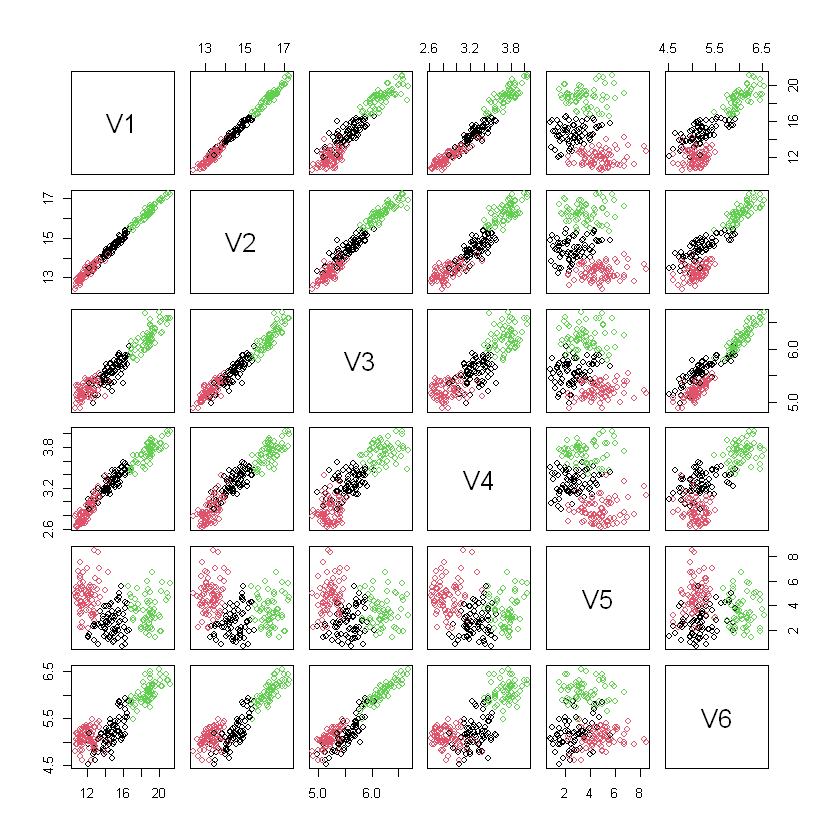

In [6]:
#2.
datos <-read.table("..//data//semillas1.txt",dec=".")
#ingresamos el valor escogido del enunciado anterior
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,-0.2189232,0.7985683,0.16423218,0.08015012,-0.010906320,-0.014971476
2,-2.1089388,-0.5304285,-0.12243032,-0.04130075,0.002155313,0.007683248
3,2.9205042,-0.2730151,-0.03930464,-0.04246970,0.010152392,0.007972724


K-means clustering with 3 clusters of sizes 72, 77, 61

Cluster means:
        V1       V2       V3       V4       V5       V6
1 14.64847 14.46042 5.563778 3.277903 2.648931 5.192319
2 11.96442 13.27481 5.229286 2.872922 4.759740 5.088519
3 18.72180 16.29738 6.208934 3.722672 3.603590 6.066098

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   3   1   2   1   1   1   1   3   1   2   1   1   3   3   2   2   1   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   3   1   2   2   3   2   1   1   3   1   1   2   1   3   3   3   2   1   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   3   1   2   3   3   2   2   2   3   2   1   2   1   1   3   1   3   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   3   2   1   3   1   3   1   3   2   3   1   1   3   1   3   1   3   1   3 
 81  82  83  84  85  86  87  88  89  

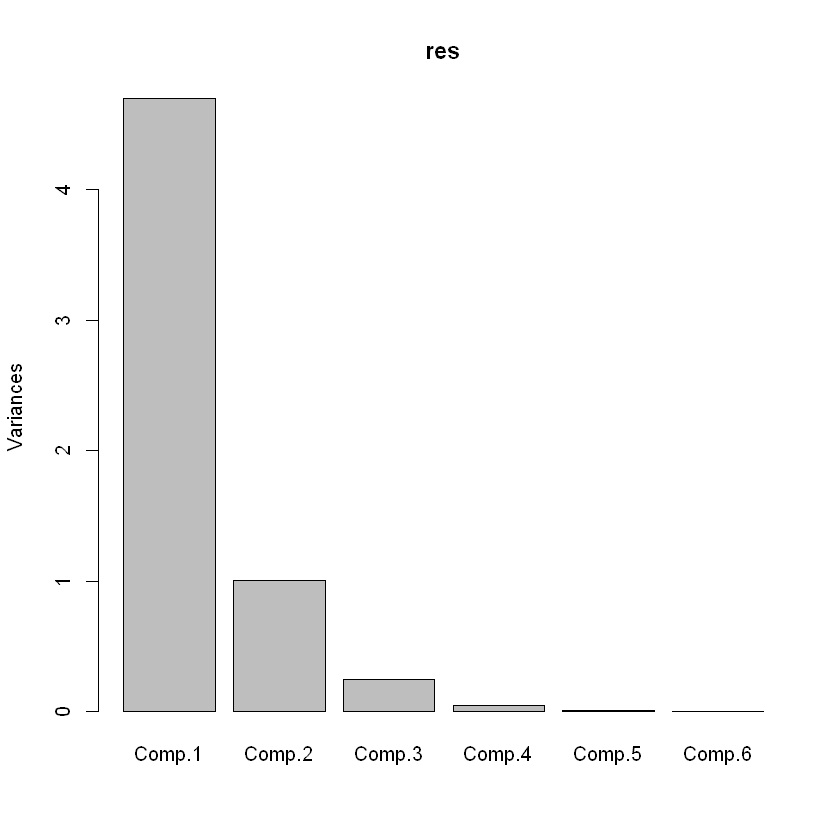

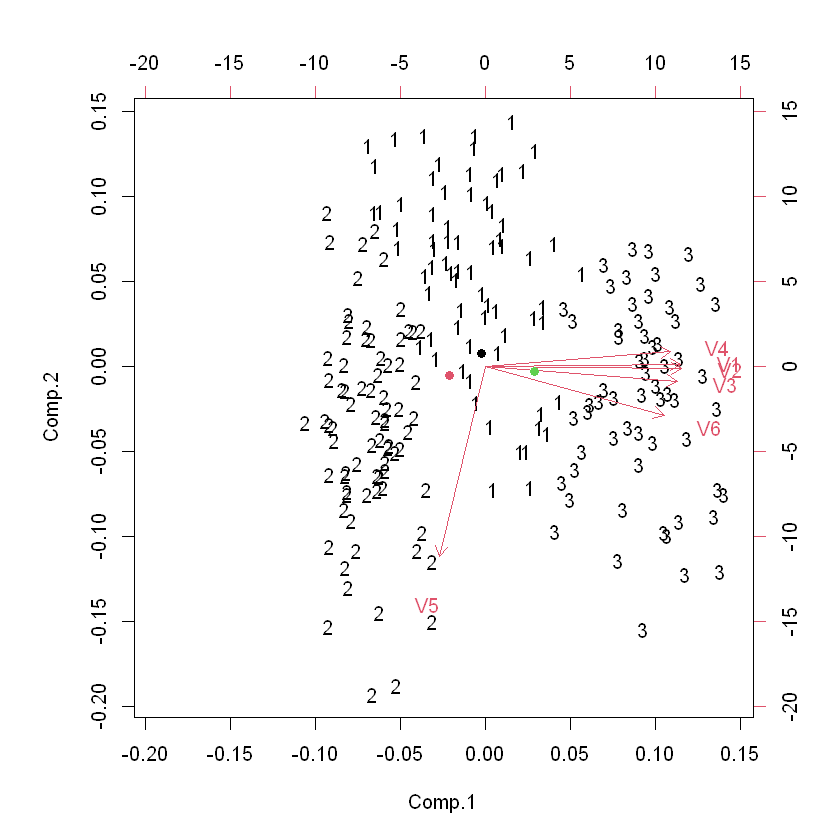

In [7]:
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


## Otras alternativas de cálculo

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



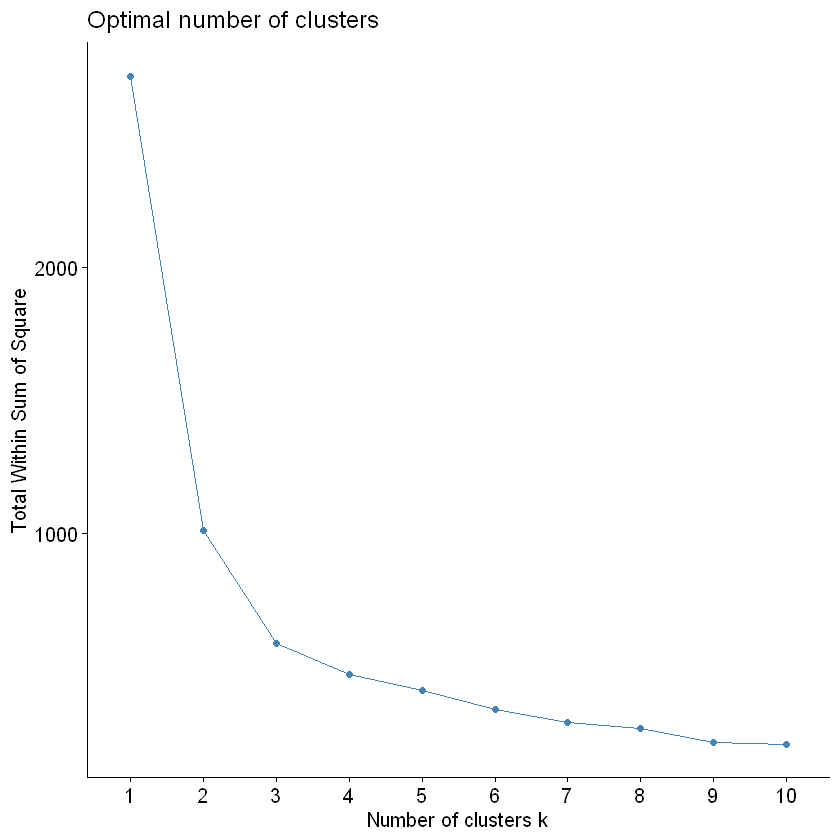

In [8]:
library(cluster)
library(factoextra)
df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")


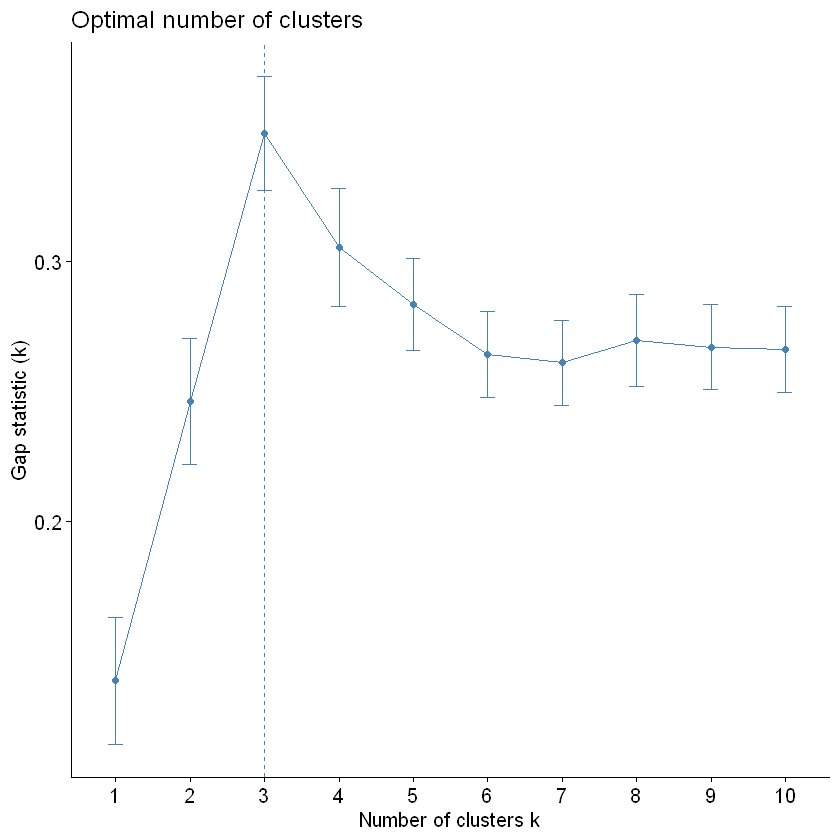

In [9]:
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

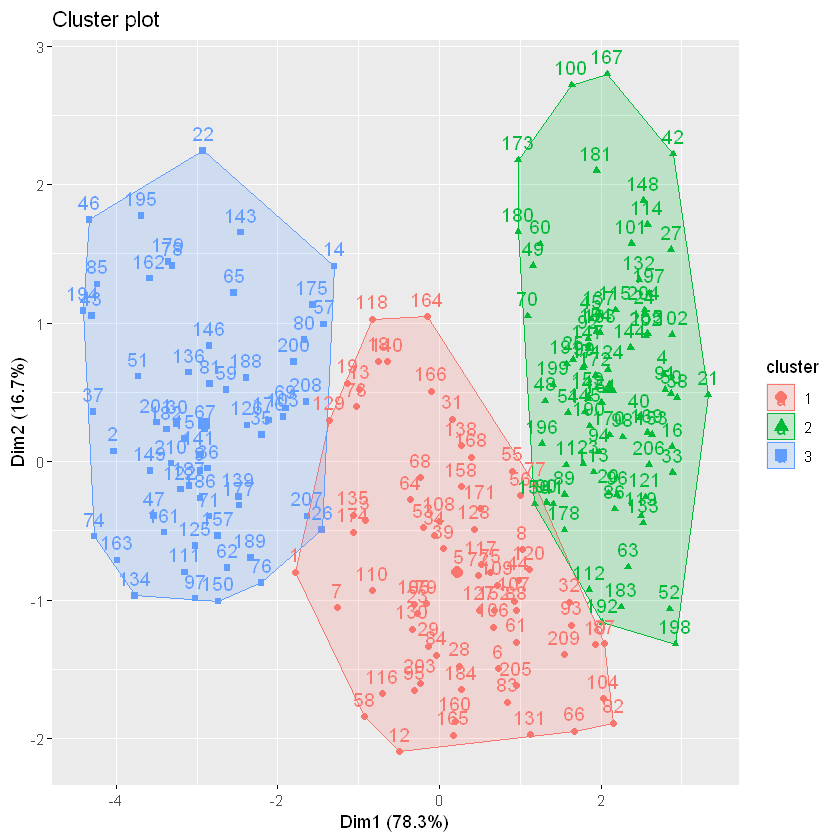

In [10]:
fviz_cluster(cl, df)

1.2: 
R: Los resultados nos indican que en base a su k optimo (3), podemos separarlos en 3 principales grupos: 
por Area, perimetro y longitud donde es mejor su agrupación, y Anchura de la semilla, coeficiente de asimetria y longitud de la ranura  donde peor se agrupan los resultados y más dispersos quedan.
Esto quiere decir que separar las semillas en estos tres grupos es lo más óptimo y son los valores que más diferencia causan entre grupos.

### Ejercicio 2:
Realice un análisis de clustering con un subconjunto de datos de datosComunas.csv (puede escoger variables (al menos 5) y comunas (al menos 30) indicando el criterio utilizado en su elección.

1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [25]:
library(corrplot)

In [93]:
datosComunas <- read.csv("..//data//datosComunas.csv" ,header=TRUE,sep=";", dec=",")


In [94]:
#1. Los datos que se tienen son variados (un motivo para agruparlos) en base a diferentes caracteristicas, tales cómo acceso y calidad de áreas verdes,
#   acceso a la salud, educación, seguridad, entre otras. En base a lo anterior, se haria bueno usar clustering para identificar patroness o similitudes que puedan
#   tener entre comunas y poder tener una lista de prioridades necesarias por parte del estado ante estos patrones.
# Básicamente estos datos nos dicen distintos características de las comunas, desde información ambiental hasta delitos y precariedad en la población, esto nos servirá mucho y lo podemos agrupar dependiedno
# de tal manera que esta información le sirva a la municipalidad para realizar cambios o anteponer algunas mejoras antes que otras.

In [120]:
##Calculamos correlación para quitar información redundante (elegimos 1 de cada grupo creado en correlacion)


# options(repr.plot.width = 12, repr.plot.height =14)
# data_matrix <- as.matrix(datosComunas[1:30,2:34])
# cor_matrix <- cor(data_matrix)
# #addrect, cantidad de rectangulos agrupadores
# #cl.pos barra de temperatura
# corrplot(cor_matrix, method = "circle", order = "hclust", addrect = 7,  cl.pos = "n")


In [143]:

#2.

#Elegimos estos datos por dos razones: 
# 1: están en razón de porcentajes, de esa manera podremos evitar errores en calculos
# 2: Tienen que ver con la participacion de las personas en las elecciones municipales, donde un porcentaje de estos
# esta en situación de pobreza, y además hay cambios infraestructurales en el ambiente, por lo que sería interesante ver
# como se dividirían estos datos.
# Esto puede conllevar más impactos entre si.

#Porcentaje de participacion en las elecciones municipales por comuna: E2
#Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF): S10
#Porcentaje de viviendas en situación de hacinamiento: S6
#Porcentaje de viviendas particulares que requieren mejoras de materialidad y/o servicios básicos: S4
#Porcentaje de manzanas con veredas con buena calidad de pavimento: S3

datos_Comunas_Procesados <- datosC[1:30, c('S10','S6','S3', 'S4','E2')]


      S10              S6               S3              S4       
 Min.   :11.89   Min.   : 4.090   Min.   :16.85   Min.   : 9.46  
 1st Qu.:16.71   1st Qu.: 4.957   1st Qu.:34.28   1st Qu.:11.31  
 Median :18.98   Median : 6.375   Median :41.66   Median :13.44  
 Mean   :19.95   Mean   : 6.766   Mean   :42.26   Mean   :15.07  
 3rd Qu.:22.66   3rd Qu.: 7.213   3rd Qu.:50.62   3rd Qu.:16.46  
 Max.   :32.15   Max.   :15.320   Max.   :72.00   Max.   :36.57  
       E2       
 Min.   :25.04  
 1st Qu.:29.86  
 Median :34.63  
 Mean   :36.12  
 3rd Qu.:40.61  
 Max.   :56.45  

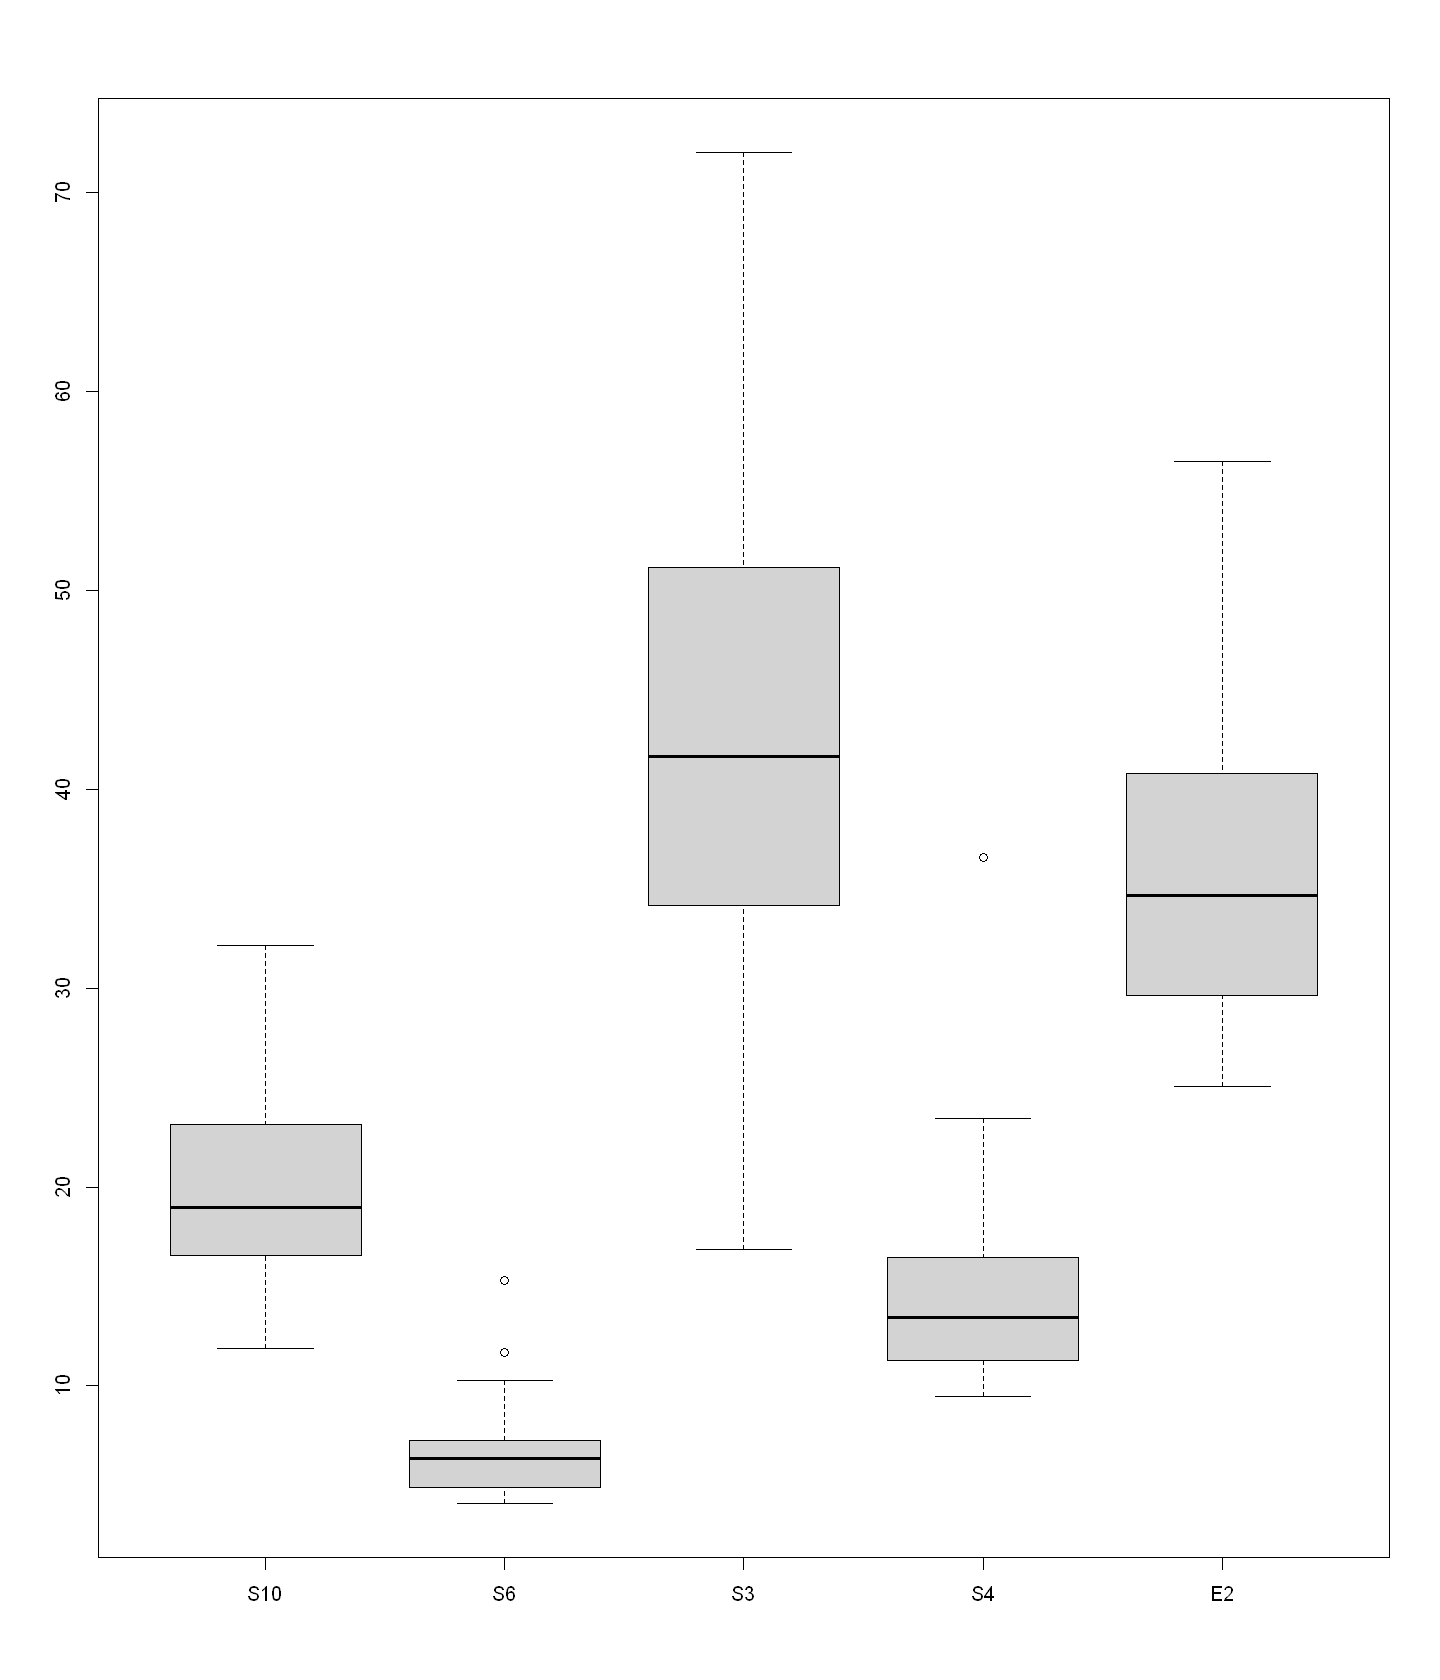

In [144]:
summary(datos_Comunas_Procesados)
boxplot(datos_Comunas_Procesados)

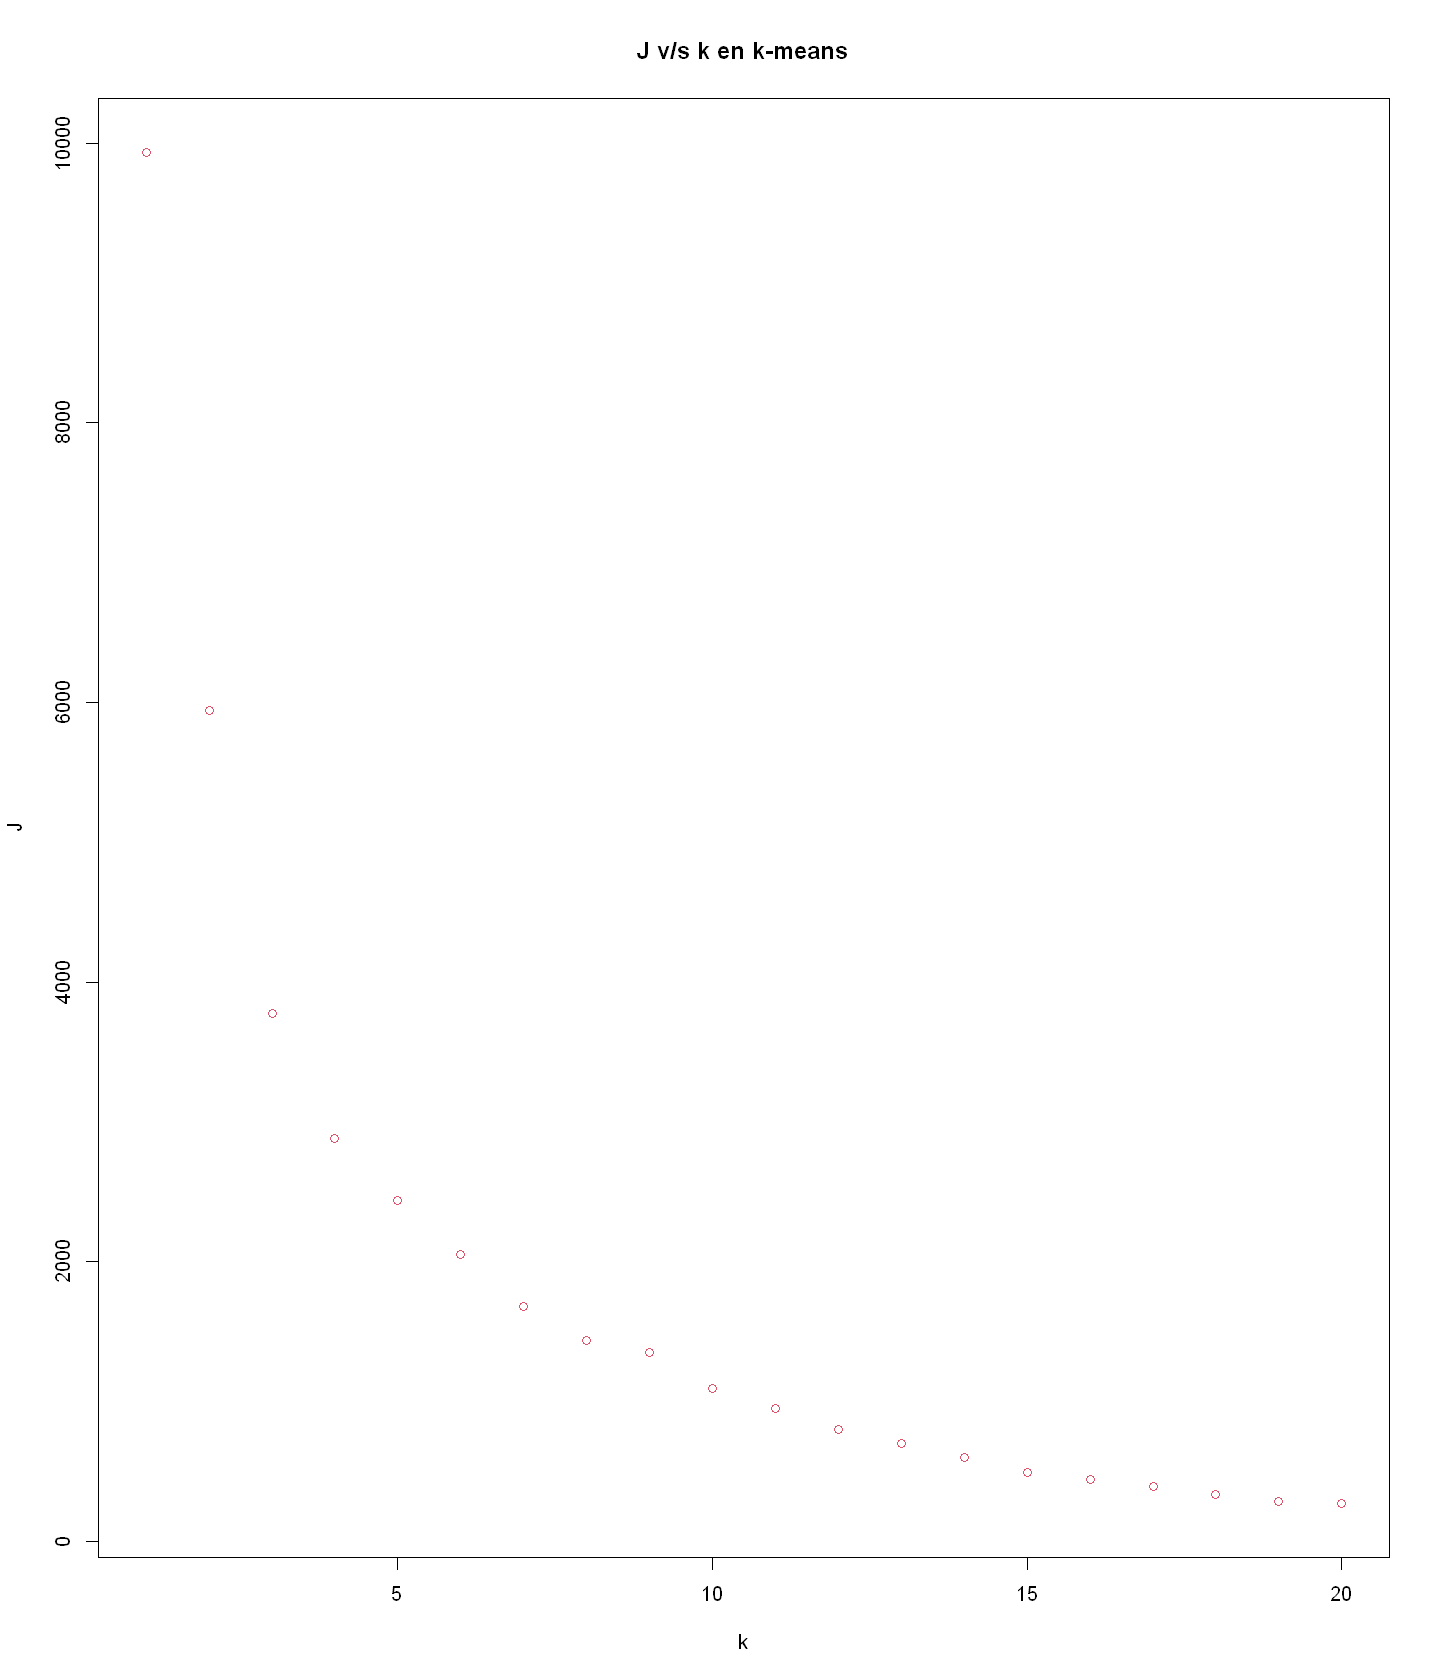

In [145]:
#Sacamos el optimo
J<-rep(0,20)
fin_iter<-20
for (k in 1:fin_iter){
     cl<-kmeans(datos_Comunas_Procesados,k,iter.max=1000,nstart=10)
	J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

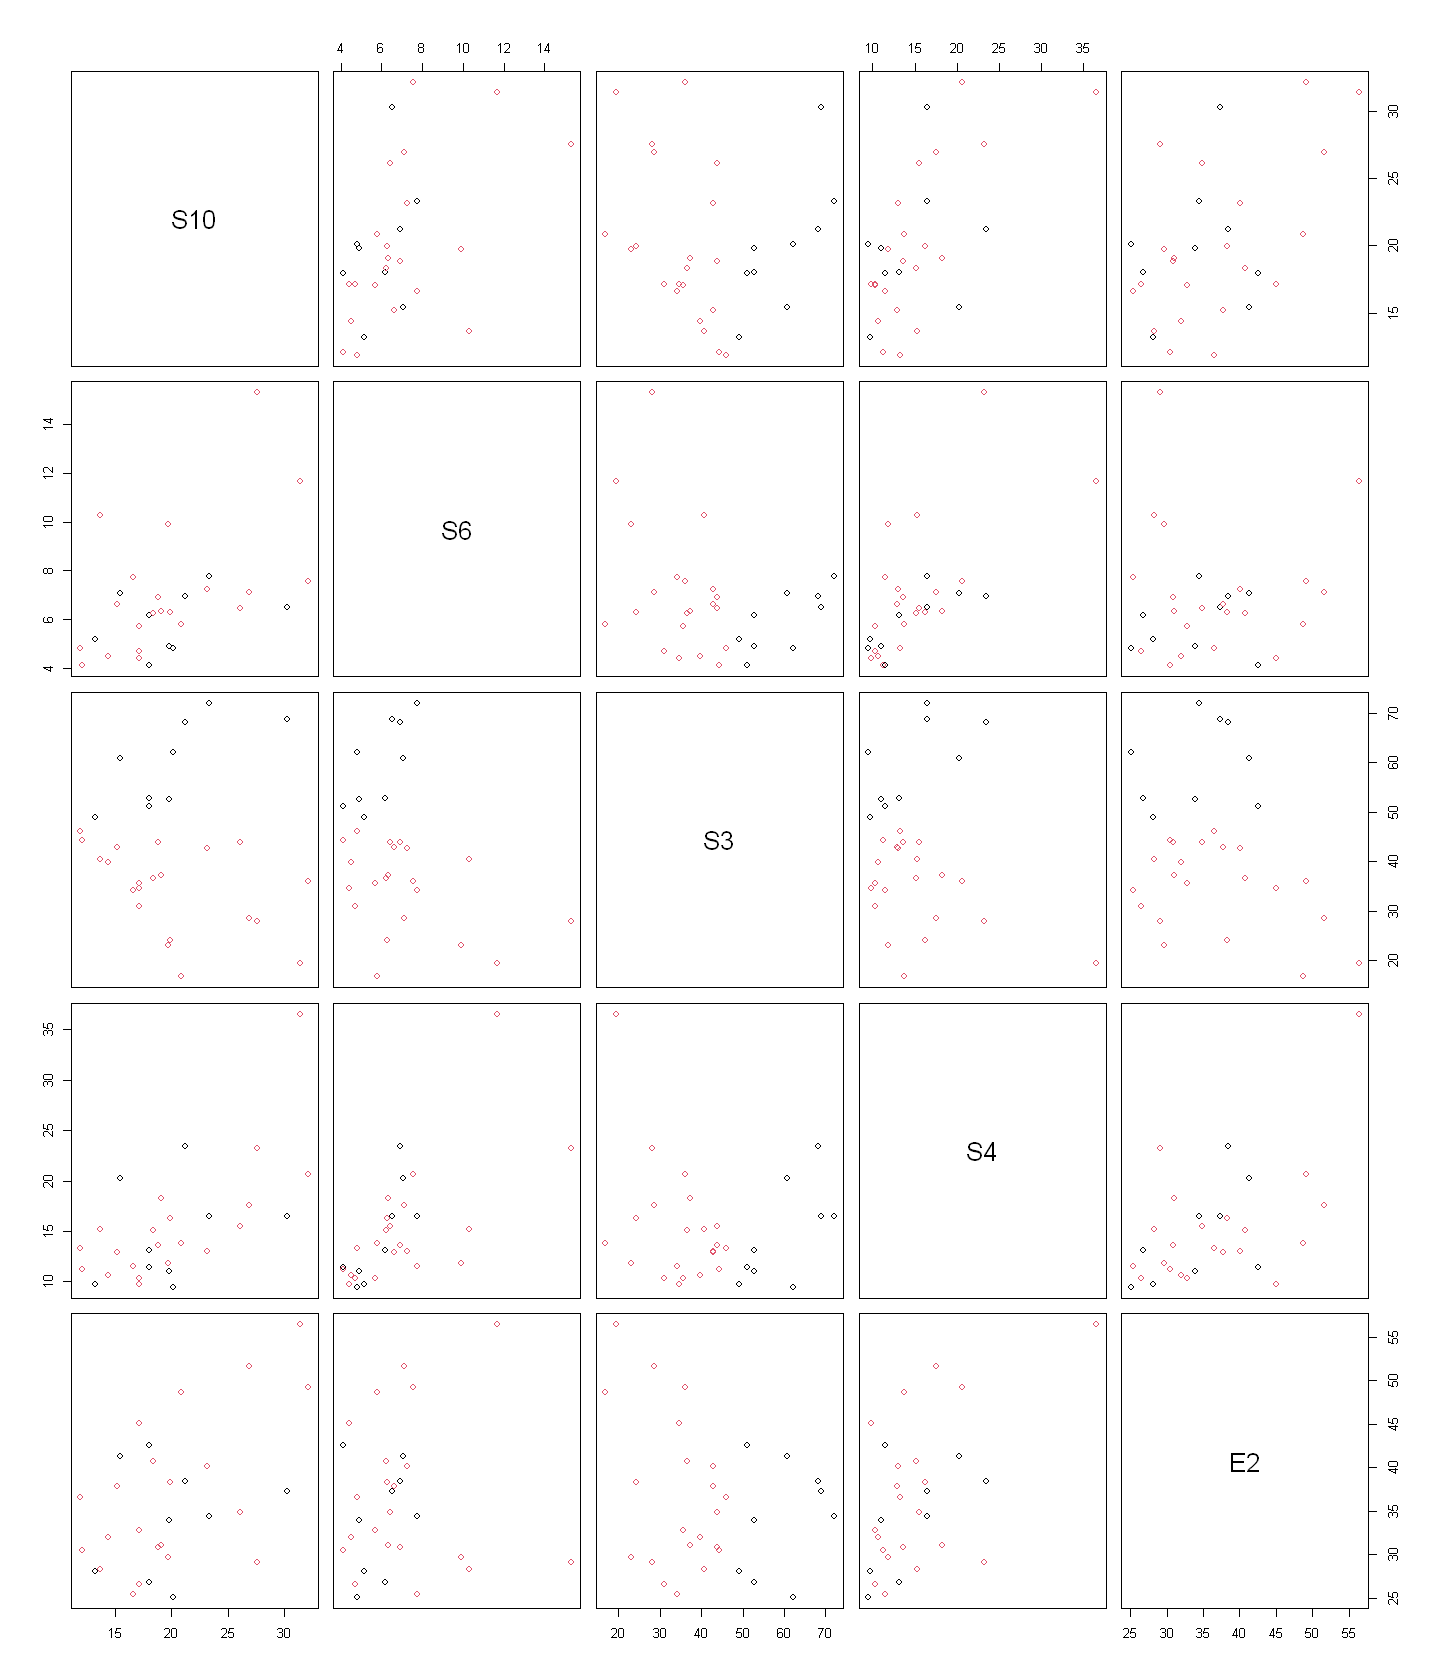

In [146]:

#ingresar valor de k 
k=2
cl<-kmeans(datos_Comunas_Procesados,k,iter.max=1000,nstart=10)

#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos_Comunas_Procesados,col=cl$cluster)

Call:
princomp(x = datos_Comunas_Procesados, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.6051253 0.9868320 0.9699646 0.6156892 0.3603205 

 5  variables and  30 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-0.5975503,1.1591158,-0.08730511,-0.04895770,-0.03381203
2,0.2560930,-0.4967639,0.03741647,0.02098187,0.01449087


K-means clustering with 2 clusters of sizes 9, 21

Cluster means:
       S10       S6       S3       S4       E2
1 19.93778 5.931111 59.74111 14.59889 34.21444
2 19.96238 7.123810 34.76095 15.26905 36.93667

Clustering vector:
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 2  2  2  2  1  2  1  1  1  2  2  2  2  2  2  1  2  2  2  2  2  1  2  1  1  1 
27 28 29 30 
 2  2  2  2 

Within cluster sum of squares by cluster:
[1] 1321.297 4623.447
 (between_SS / total_SS =  40.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

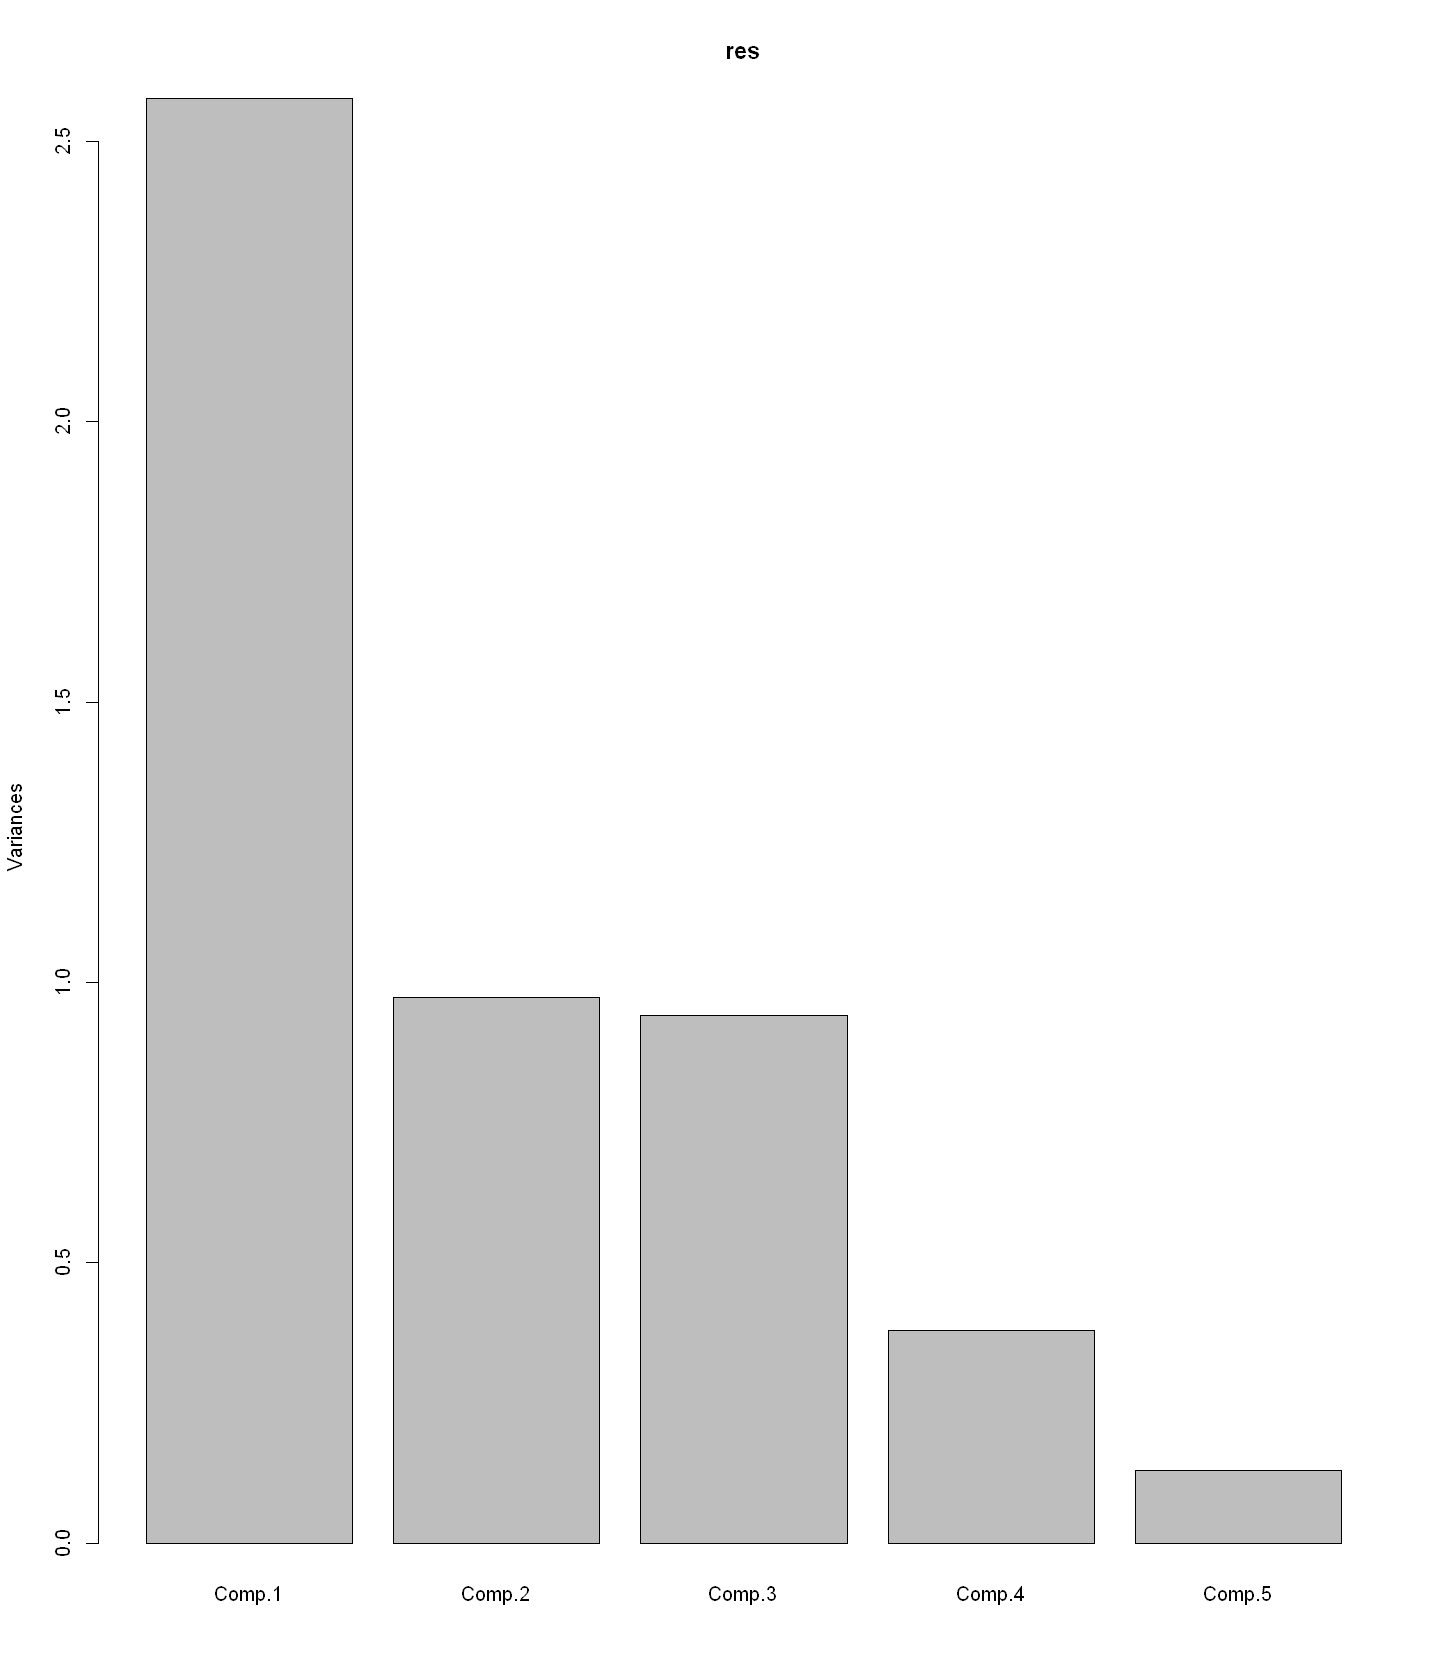

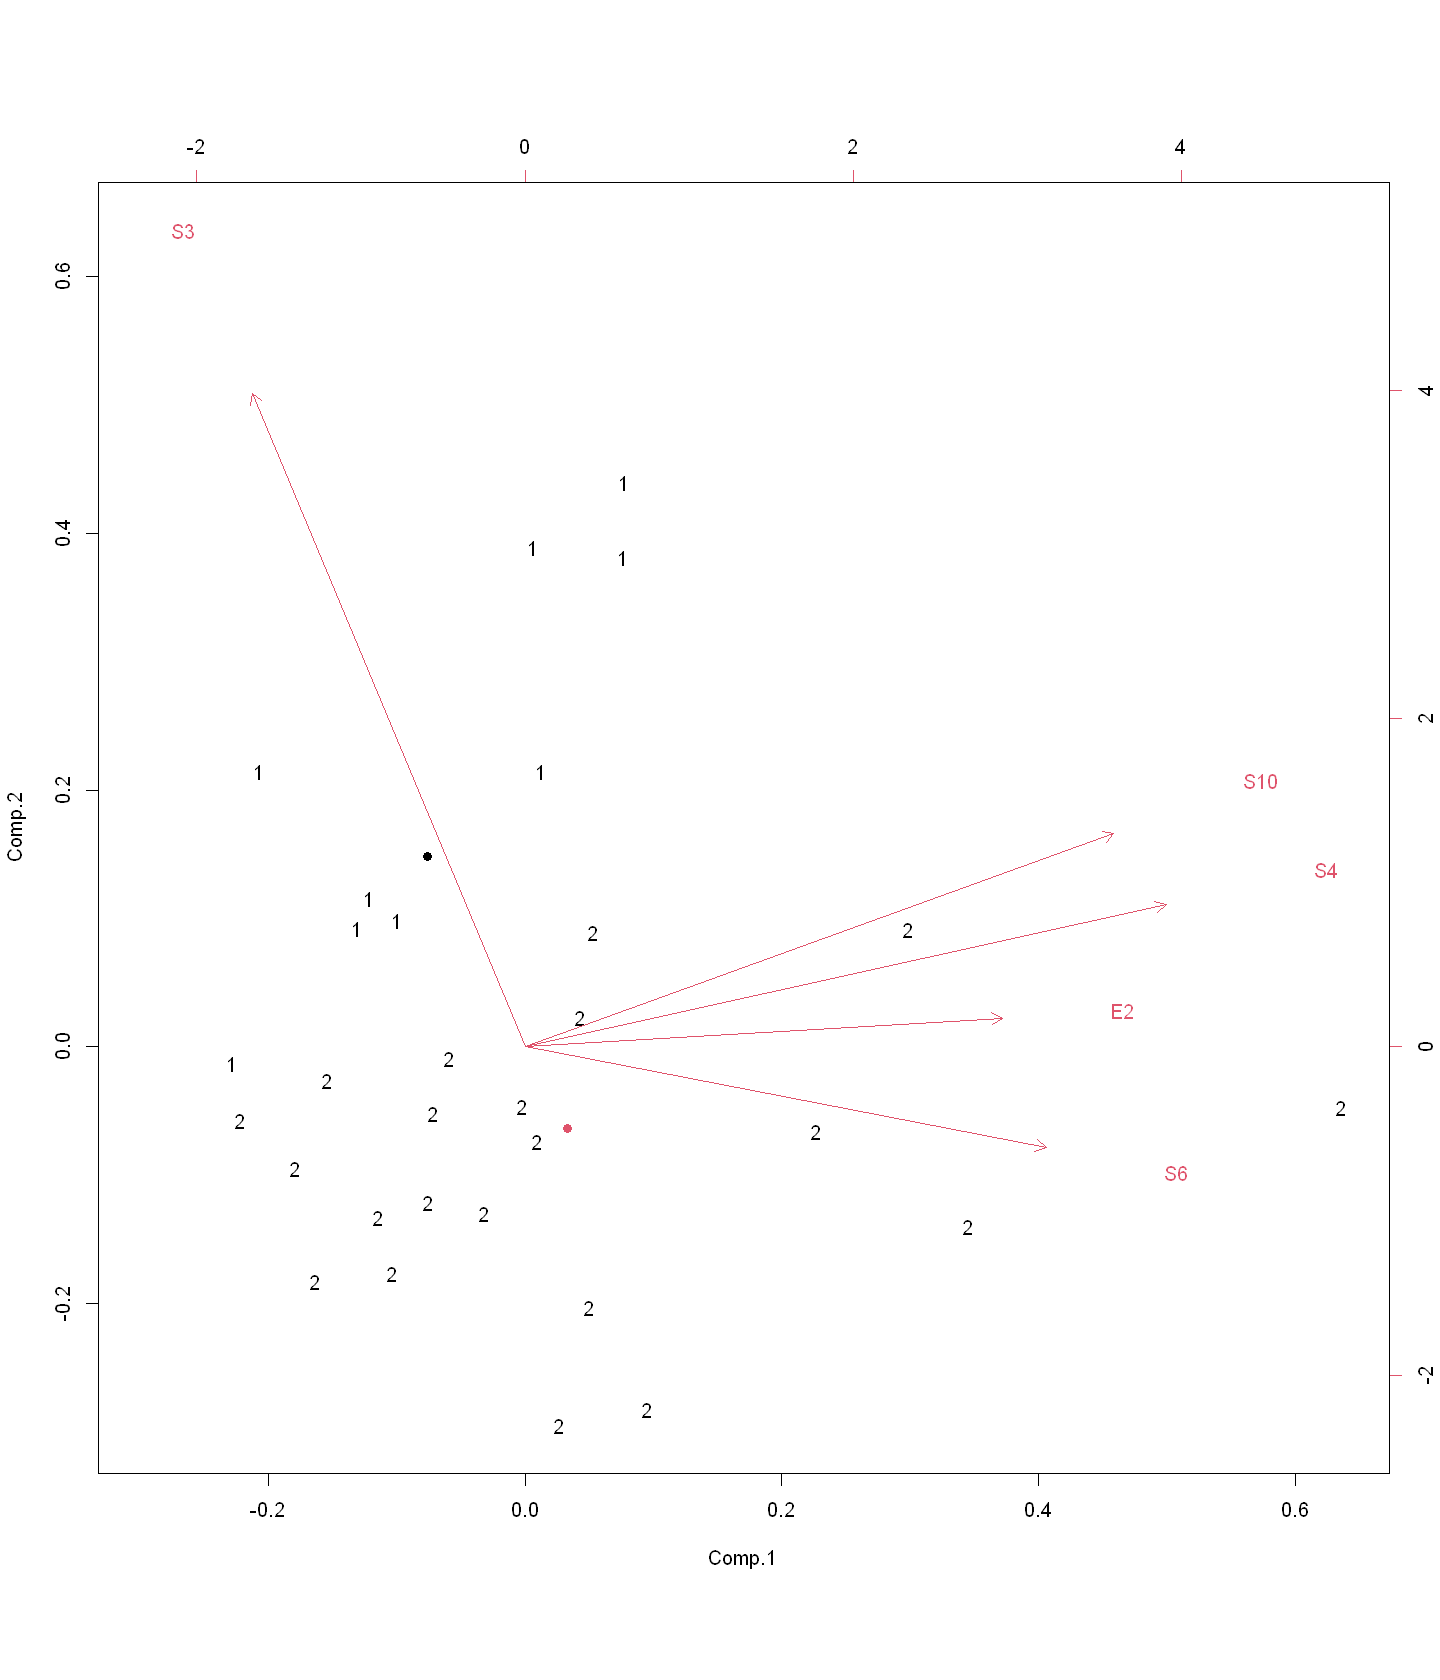

In [147]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos_Comunas_Procesados, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


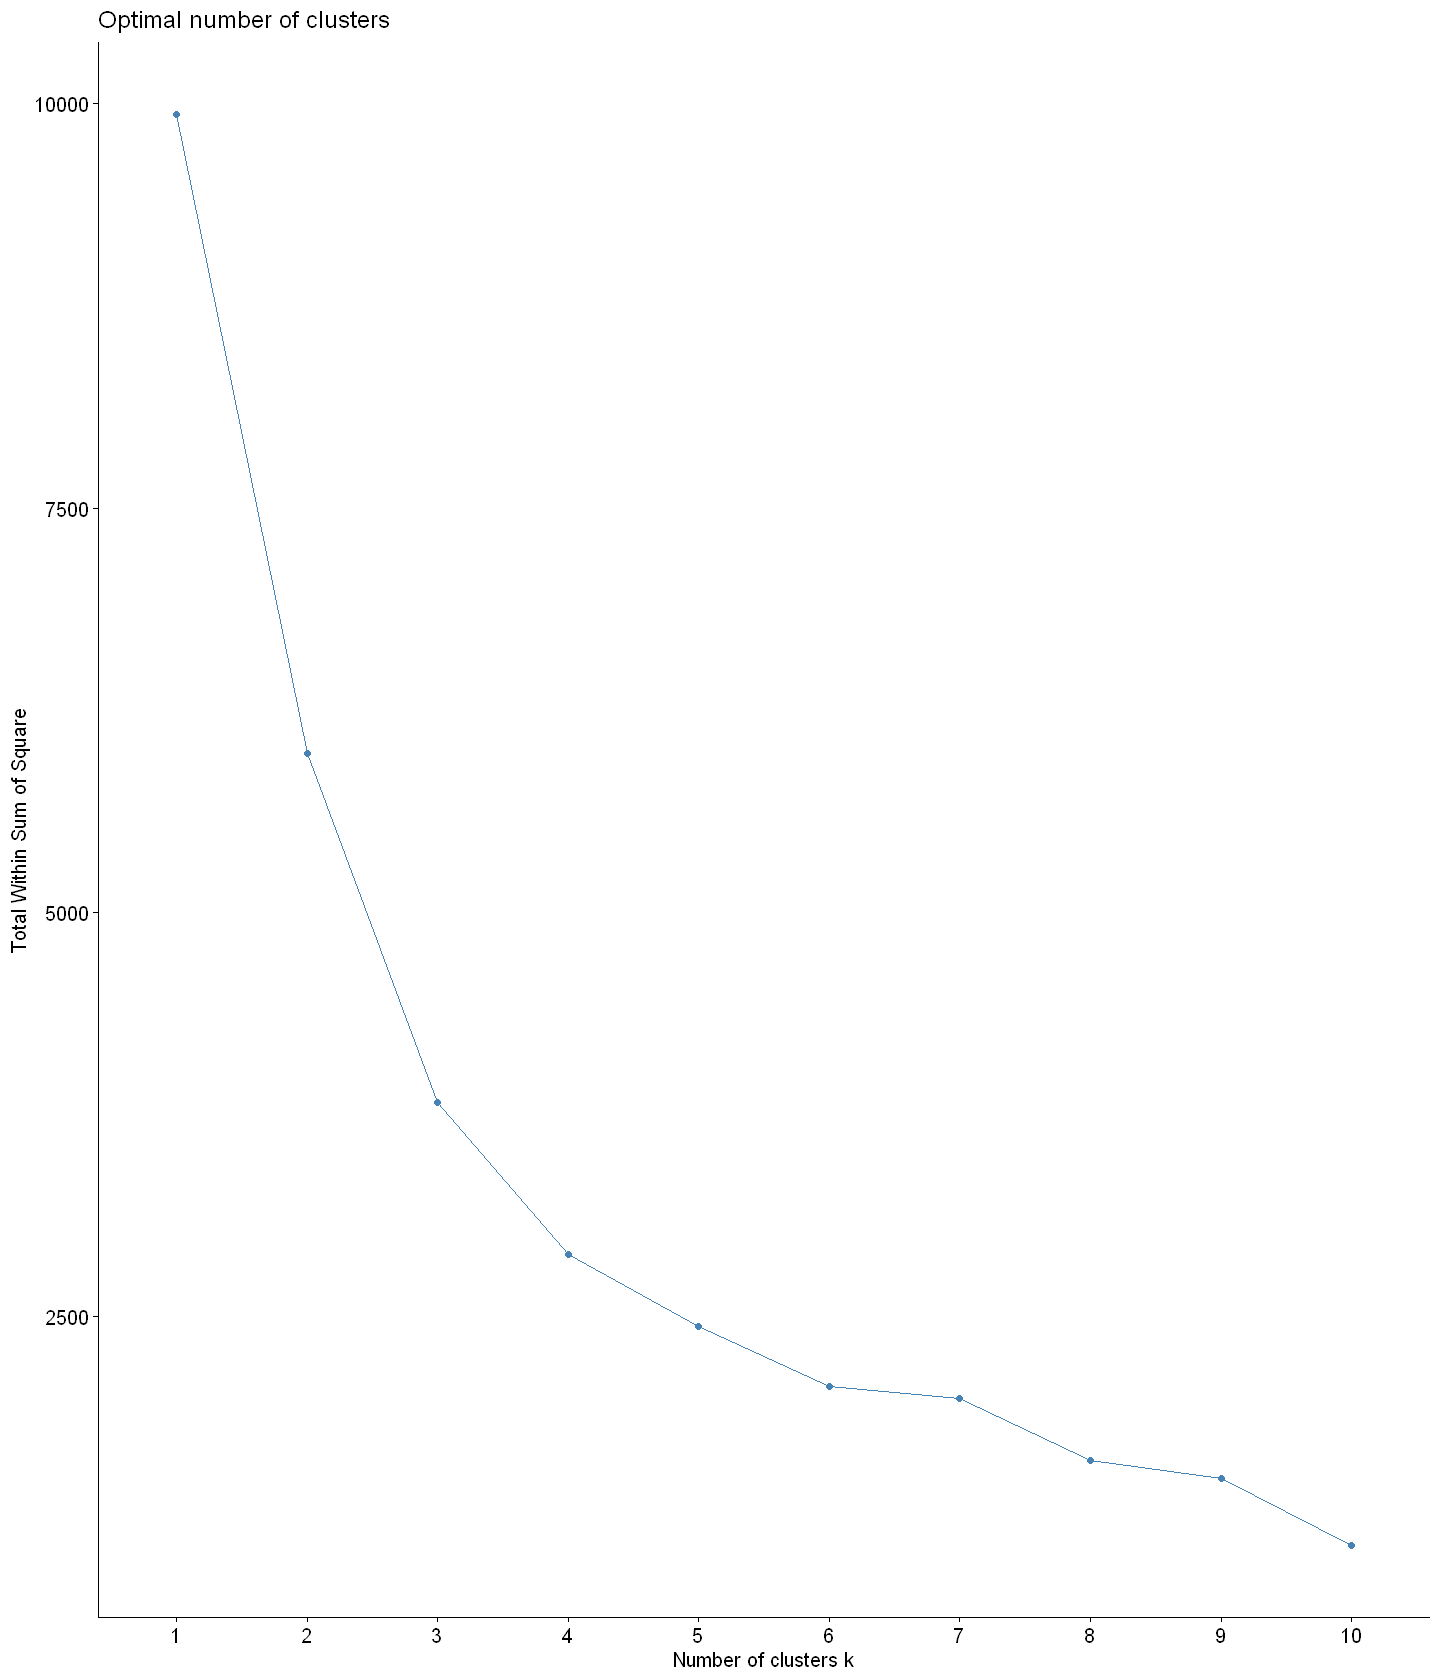

In [148]:
library(cluster)
library(factoextra)
df <- data.frame(datos_Comunas_Procesados)
fviz_nbclust(df, kmeans, method = "wss")

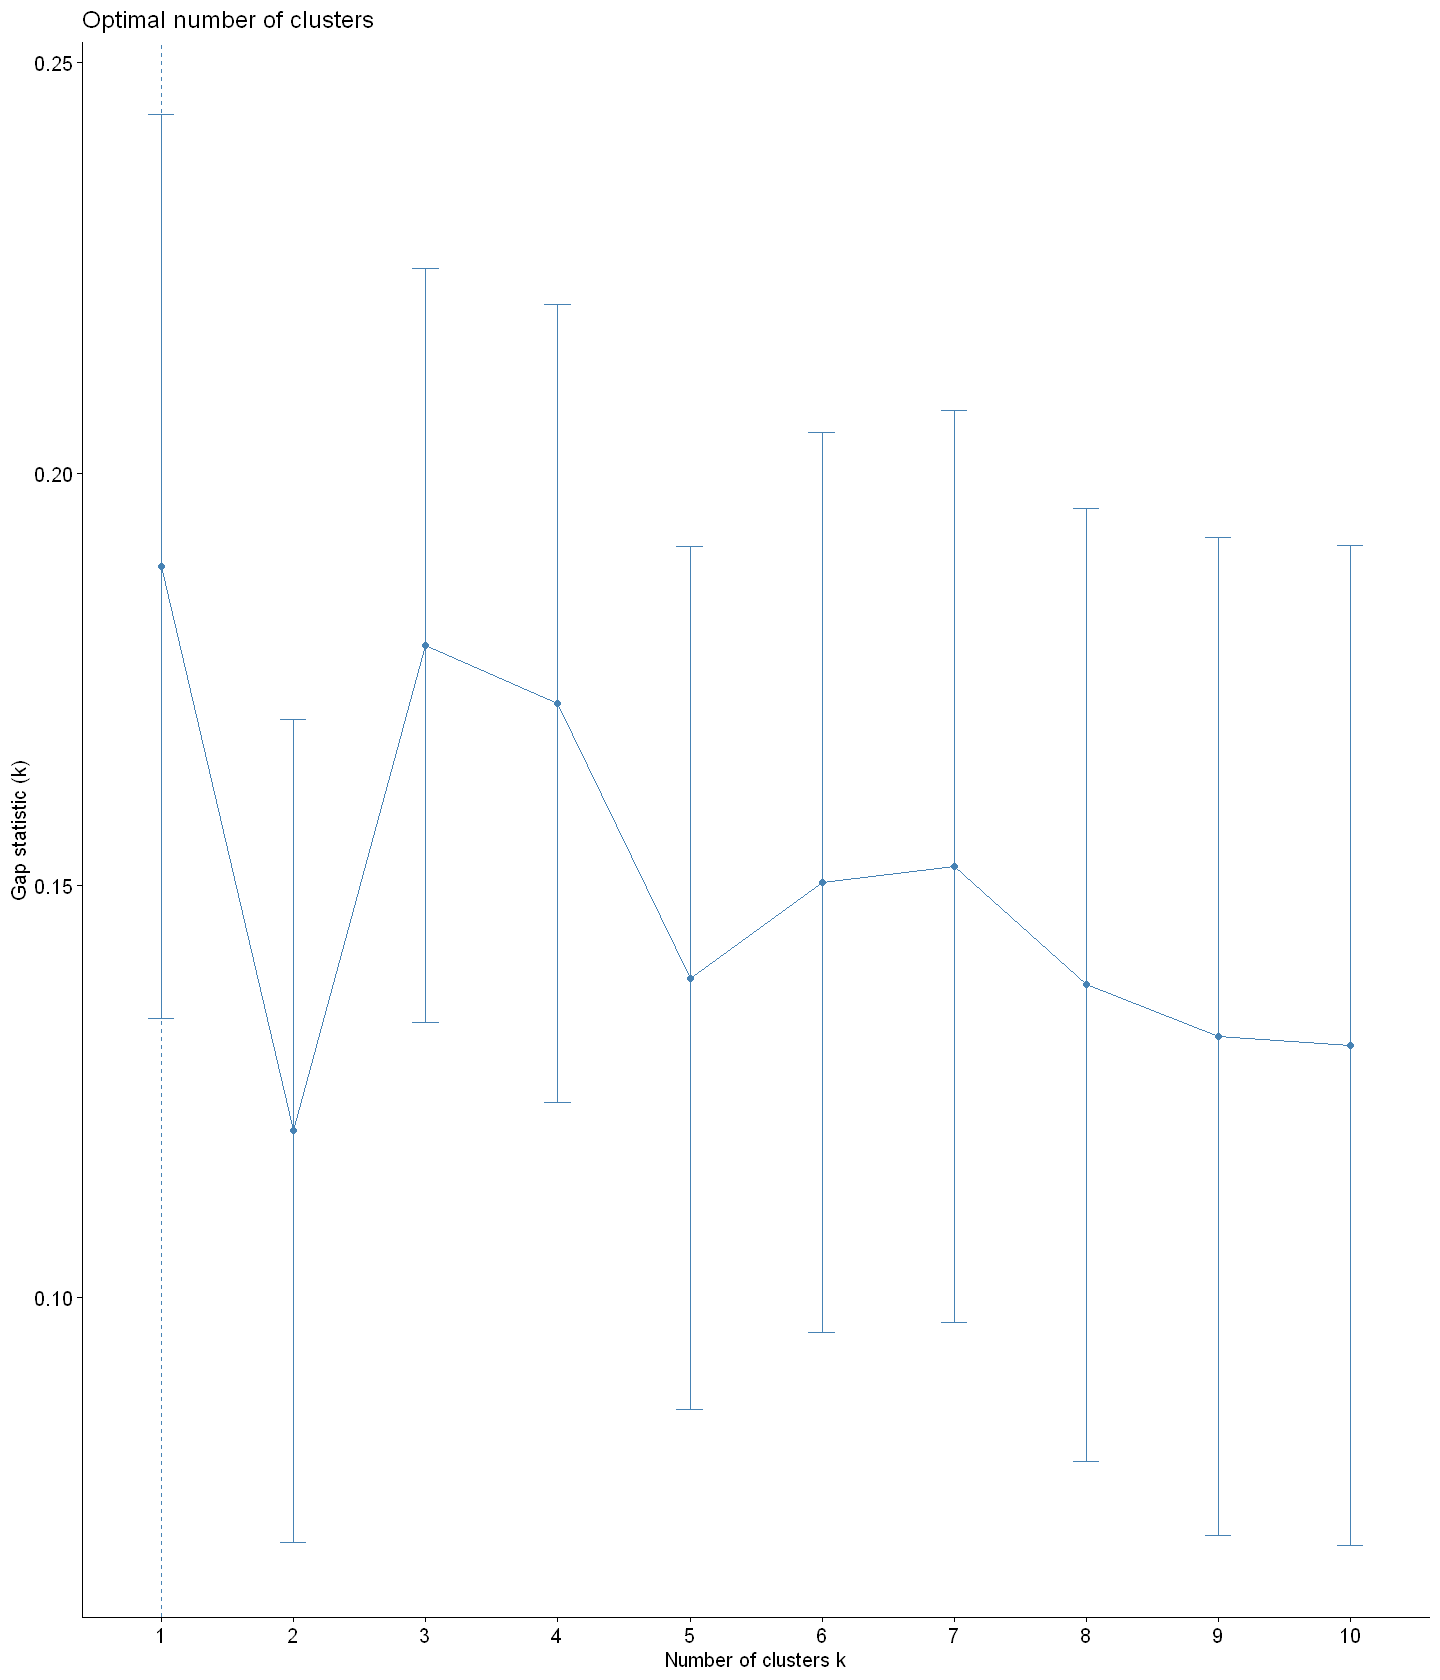

In [149]:
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

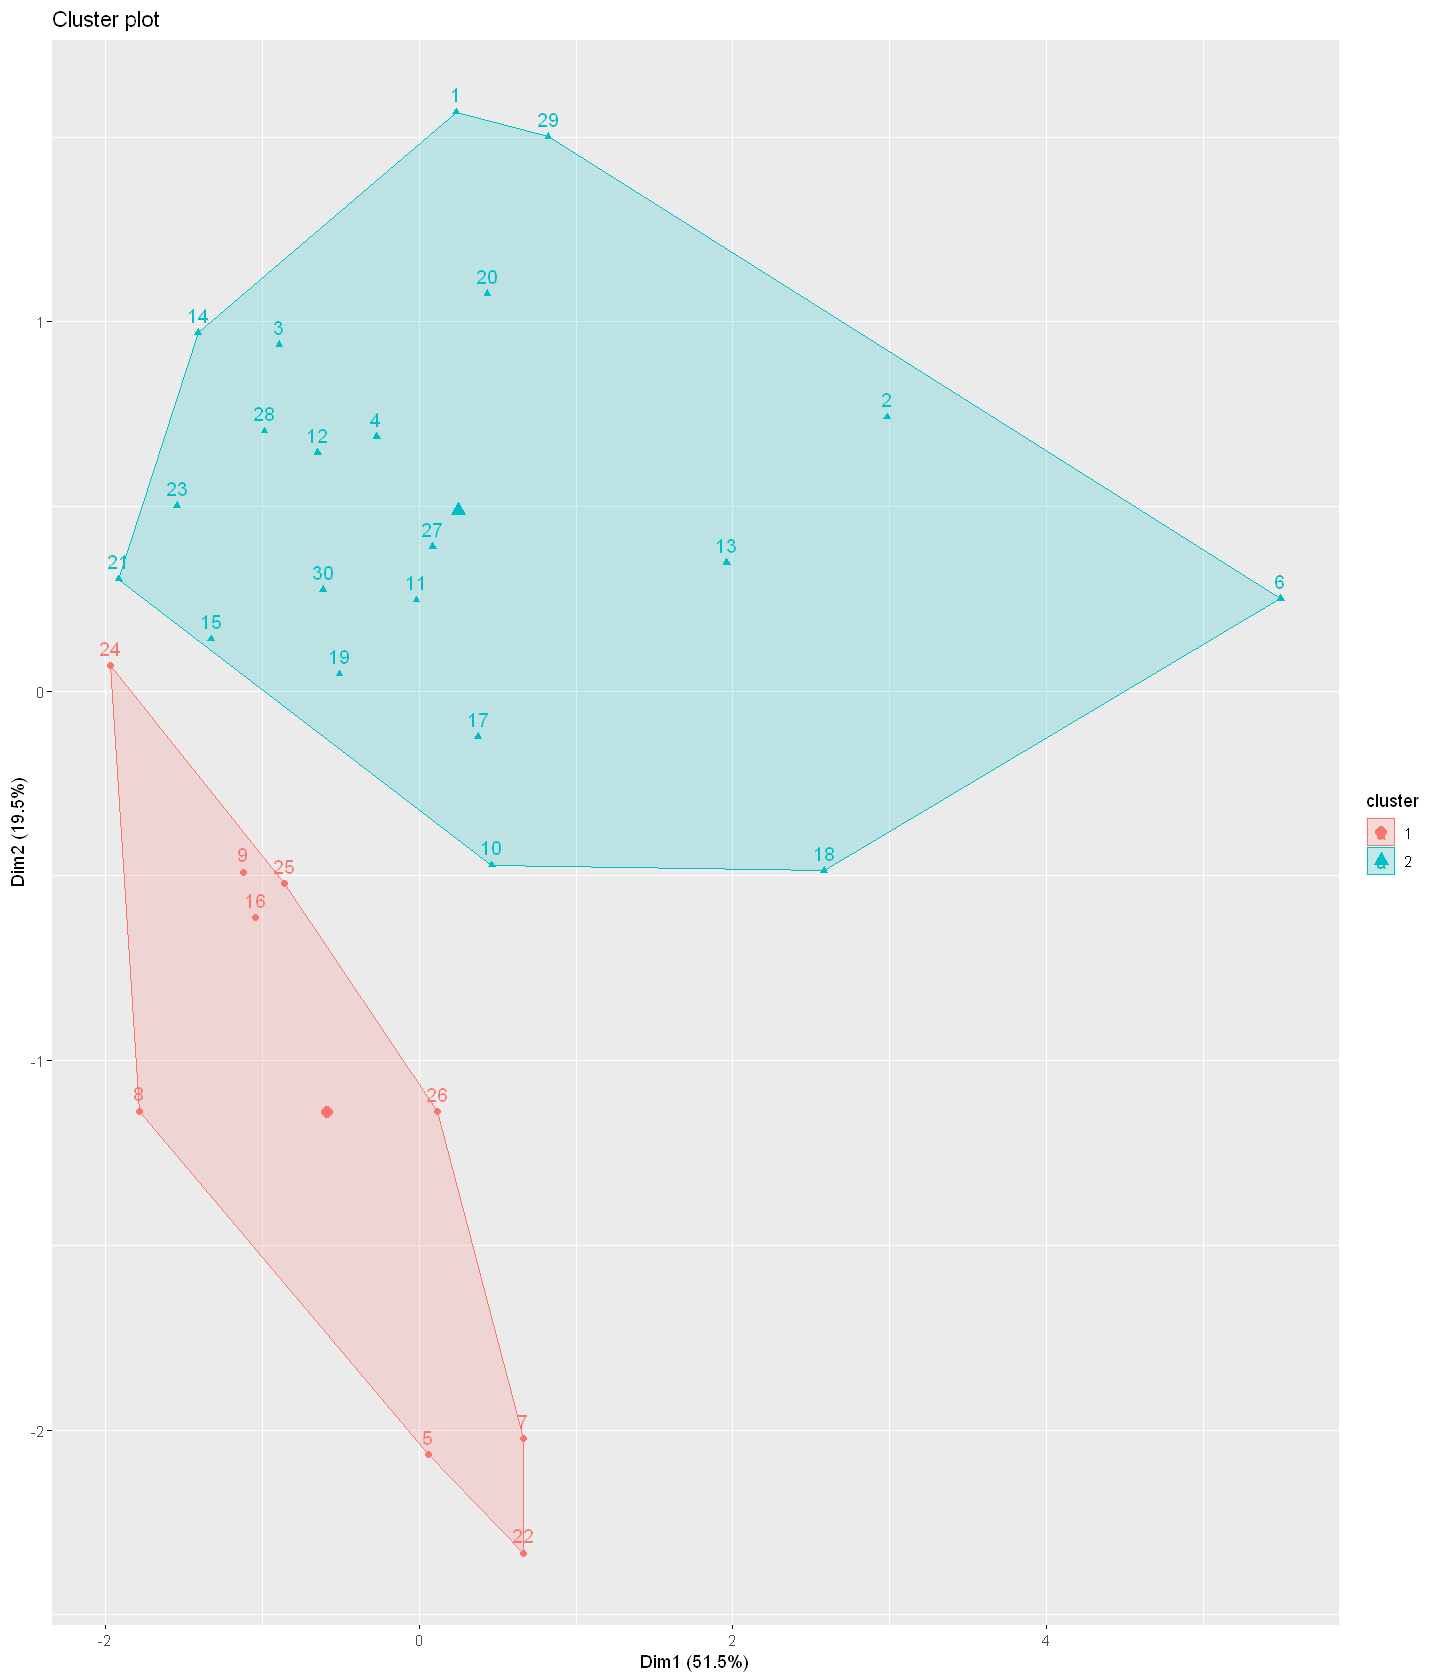

In [150]:
fviz_cluster(cl, df)

2.3) Básicamente, y en base a los gráficos anteriores, los grupos se separaron más que nada en Porcentaje de manzanas con veredas con buena calidad de pavimento (S3):G1
y E2,S10,S6 y S4: G2
Esto quiere decir que dentro del G2 hay mucha mas correlación entre ellos, en cambio para S3, no hay nada de correlación con el resto.
Esto tiene que ver más que nada en que el grupo 2 en base a su naturaleza más social-económica-política tiene mas relación, en cambio, S3, al ser
algo más estructural no influencia mucho al resto.